In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_data_df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
lending_data_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [3]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data_df[['loan_status']]

# Separate the X variable, the features
X = lending_data_df.drop(columns = ['loan_status'])

In [4]:
# Review the y variable Series
y[:5]

,loan_status
0,0
1,0
2,0
3,0
4,0


In [5]:
# Review the X variable DataFrame
X[:5]

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [6]:
# Check the balance of our target values
y.value_counts()

loan_status
0              75036
1               2500
dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [7]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [8]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [9]:
# Make a prediction using the testing data
testing_predictions = lr_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [10]:
# Print the balanced_accuracy score of the model
# Display the accuracy score for the test dataset.
balanced_accuracy_score(y_test, testing_predictions)

0.9520479254722232

In [11]:
# Generate a confusion matrix for the model
cm_test = confusion_matrix(y_test, testing_predictions)
cm_test_df = pd.DataFrame(
    cm_test, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [12]:
# Print the classification report for the model
target_names = ["healthy loan", "high-risk loan"]
print("Confusion Matrix")
display(cm_test_df)
print(f"Accuracy Score : {balanced_accuracy_score(y_test, testing_predictions)}")
print("Classification Report")
print(classification_report(y_test, testing_predictions, target_names = target_names))
cr1 = classification_report(y_test, testing_predictions, target_names = target_names)

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,18663,102
Actual 1,56,563


Accuracy Score : 0.9520479254722232
Classification Report
                precision    recall  f1-score   support

  healthy loan       1.00      0.99      1.00     18765
high-risk loan       0.85      0.91      0.88       619

      accuracy                           0.99     19384
     macro avg       0.92      0.95      0.94     19384
  weighted avg       0.99      0.99      0.99     19384



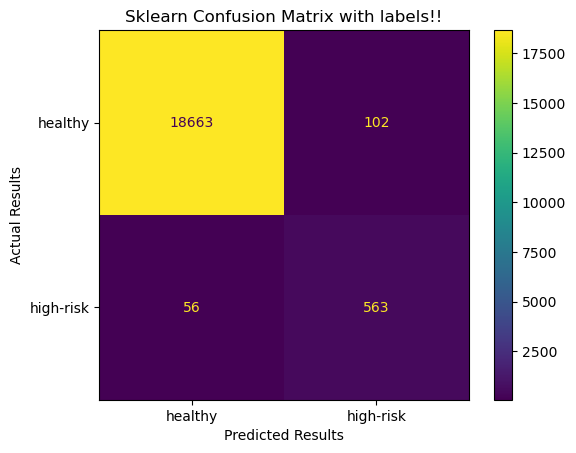

In [13]:
# Plot the Confusion Matrix Display

cmd_test = ConfusionMatrixDisplay(cm_test, display_labels=['healthy', 'high-risk'])
cmd_test.plot()
cmd_test.ax_.set(
                title='Sklearn Confusion Matrix with labels!!', 
                xlabel='Predicted Results', 
                ylabel='Actual Results')
plt.show()


### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model yields better results for the healthy loans vs the high-risk loans.  However, the support count for high-risk loans is much lower than the healthy loans.  Balanced accuracy score is 95.2% indicating a well performance.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [14]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resample, y_resample = ros.fit_resample(X_train, y_train)

In [15]:
# Count the distinct values of the resampled labels data
y_resample.value_counts()


loan_status
0              56271
1              56271
dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [16]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
ros_logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
ros_logistic_regression_model = ros_logistic_regression_model.fit(X_resample, y_resample)

# Make a prediction using the testing data
predictions_ros = ros_logistic_regression_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Print the balanced_accuracy score of the model 
print(balanced_accuracy_score(y_test, predictions_ros))

0.9936781215845847


In [18]:
# Generate a confusion matrix for the model
ros_cm = confusion_matrix(y_test, predictions_ros)
ros_cm_df = pd.DataFrame(
    ros_cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])


In [19]:
# Print the classification report for the model
print("Confusion Matrix (Resampled Data)")
display(ros_cm_df)
print(f"Accuracy Score : {balanced_accuracy_score(y_test, predictions_ros)}")
print("Classification Report (Resampled Data)")
print(classification_report(y_test, predictions_ros, target_names = target_names))
cr2 = classification_report(y_test, predictions_ros, target_names = target_names)

Confusion Matrix (Resampled Data)


,Predicted 0,Predicted 1
Actual 0,18649,116
Actual 1,4,615


Accuracy Score : 0.9936781215845847
Classification Report (Resampled Data)
                precision    recall  f1-score   support

  healthy loan       1.00      0.99      1.00     18765
high-risk loan       0.84      0.99      0.91       619

      accuracy                           0.99     19384
     macro avg       0.92      0.99      0.95     19384
  weighted avg       0.99      0.99      0.99     19384



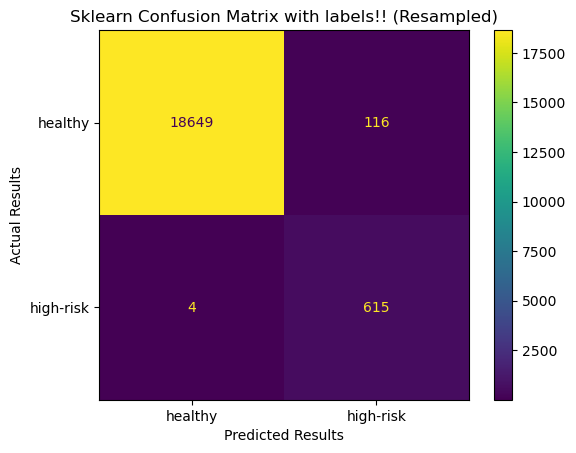

In [20]:
# Plot the Confusion Matrix Display for the ROS model

cmd_ros = ConfusionMatrixDisplay(ros_cm, display_labels=['healthy', 'high-risk'])
cmd_ros.plot()
cmd_ros.ax_.set(
                title='Sklearn Confusion Matrix with labels!! (Resampled)', 
                xlabel='Predicted Results', 
                ylabel='Actual Results')
plt.show()

In [21]:
print("Classification Report")
print(cr1) 
print("Classification Report (Resampled Data)")
print(cr2)


Classification Report
                precision    recall  f1-score   support

  healthy loan       1.00      0.99      1.00     18765
high-risk loan       0.85      0.91      0.88       619

      accuracy                           0.99     19384
     macro avg       0.92      0.95      0.94     19384
  weighted avg       0.99      0.99      0.99     19384

Classification Report (Resampled Data)
                precision    recall  f1-score   support

  healthy loan       1.00      0.99      1.00     18765
high-risk loan       0.84      0.99      0.91       619

      accuracy                           0.99     19384
     macro avg       0.92      0.99      0.95     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model, fit with oversampled data, predicted better results for the high-risk loans with little difference for the healthy loans. The resampled data performs better with a balanced accuracy score of 99%.